# Tarea 1 - Introducción a la Biomecánica
### Pregunta 2

In [1]:
# Importación de librerías

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definición de parámetros

a = 43
b = 50

E = 0.3

P_i = -0.04
P_e = 0

In [3]:
# Definición de función B

B = (3 / (2 * E)) * ((a ** 2 * b ** 2) / (b ** 2 - a ** 2)) * (P_i - P_e)

In [4]:
# Creación de malla

R = np.linspace(a, b, 30)
T = np.linspace(0, 2 * np.pi, 180)
RR, TT = np.meshgrid(R, T)

[]

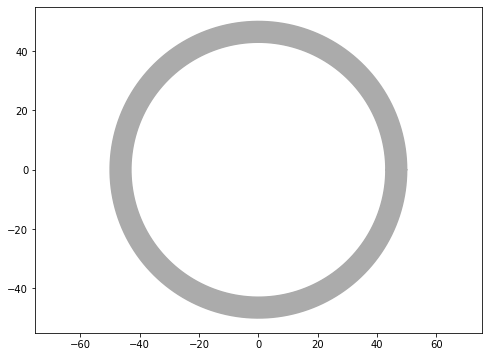

In [5]:
# Ploteo sin deformación

XX = RR * np.cos(TT)
YY = RR * np.sin(TT)

fig = plt.figure(figsize=(8,6))
plt.plot(XX, YY, color='#ABABAB')
plt.axis('equal')
plt.plot()

In [6]:
# Función de deformación

def phi(R, T):
    r = R + B / R
    t = T
    return r, t

In [7]:
# Creación de malla deformada

rr, tt = phi(RR,TT)

xx = rr * np.cos(tt)
yy = rr * np.sin(tt)

[]

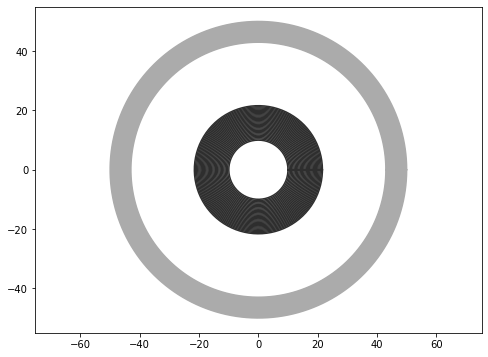

In [8]:
# Ploteo con deformación

fig = plt.figure(figsize=(8,6))
plt.plot(XX, YY, color='#ABABAB')
plt.plot(xx, yy, color='#2E2E2E')
plt.axis('equal')
plt.plot()

In [9]:
# Definición de tensores de deformación

E_rr = np.zeros(RR.shape)
E_tt = np.zeros(RR.shape)
E_rt = np.zeros(RR.shape)

E_xx = np.zeros(RR.shape)
E_yy = np.zeros(RR.shape)
E_xy = np.zeros(RR.shape)

In [10]:
# Definición de tensor gradiente de deformación

F = np.zeros((*RR.shape, 3, 3))
F.shape

(180, 30, 3, 3)

In [11]:
# Parámetro Z

zz = 1

In [12]:
# Cálculo de tensores de deformación

for i in range(len(RR[:, 0])):
    for j in range(len(RR[0, :])):
        local_F = np.array([
            [1 - (B / RR[i, j] ** 2), 0, 0],
            [0, 1 + (B / RR[i, j] ** 2), 0],
            [-(4 * zz * B ** 2) / ((1 - (B ** 2 / RR[i, j] ** 4)) * RR[i, j] ** 5), 0, 1 / (1 - (B ** 2 / RR[i, j] ** 4))]
        ])
        F[i, j] = local_F
        
        Q = np.array([
            [np.cos(TT[i, j]), np.sin(TT[i, j]), 0],
            [-np.sin(TT[i, j]), np.cos(TT[i, j]), 0],
            [0, 0, 1]
        ])      
        
        local_E = 1/2*(np.transpose(local_F) @ local_F - np.identity(len(local_F)))
        E_rr[i, j] = local_E[0, 0]
        E_tt[i, j] = local_E[1, 1]
        E_rt[i, j] = local_E[0, 1]
        
        local_other_E = np.transpose(Q) @ local_E @ Q

        E_xx[i, j] = local_other_E[0, 0]
        E_yy[i, j] = local_other_E[1, 1]
        E_xy[i, j] = local_other_E[0, 1]

C:\Users\ivanv\AppData\Local\Temp/ipykernel_10088/4278218554.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(XX, YY, E_rr)


[]

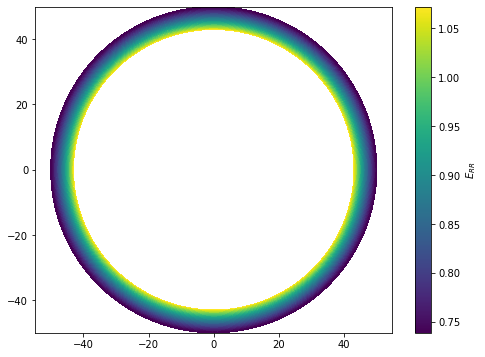

In [13]:
# Ploteo de E_rr

fig = plt.figure(figsize=(8, 6))
plt.pcolor(XX, YY, E_rr)
plt.colorbar(label = r'$E_{RR}$')
plt.axis('equal')
plt.plot()

C:\Users\ivanv\AppData\Local\Temp/ipykernel_10088/1549493382.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(XX, YY, E_tt)


[]

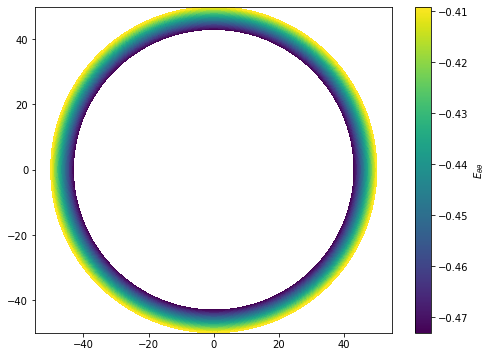

In [14]:
# Ploteo de E_tt

fig = plt.figure(figsize=(8, 6))
plt.pcolor(XX, YY, E_tt)
plt.colorbar(label = r'$E_{\theta\theta}$')
plt.axis('equal')
plt.plot()

C:\Users\ivanv\AppData\Local\Temp/ipykernel_10088/2924271381.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(XX, YY, E_rt)


[]

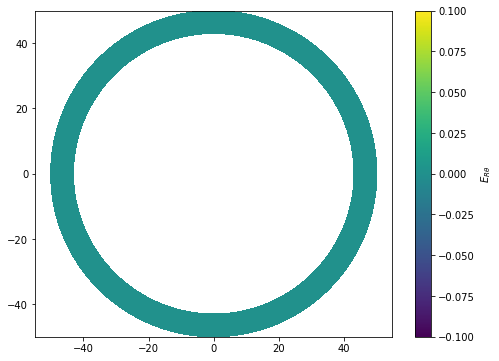

In [15]:
# Ploteo de E_rt

fig = plt.figure(figsize=(8, 6))
plt.pcolor(XX, YY, E_rt)
plt.colorbar(label = r'$E_{R\theta}$')
plt.axis('equal')
plt.plot()

C:\Users\ivanv\AppData\Local\Temp/ipykernel_10088/2907703197.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(XX, YY, E_xx)


[]

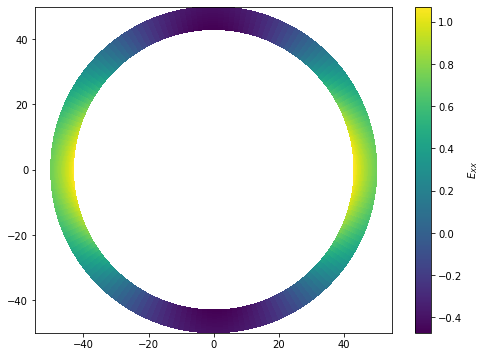

In [16]:
# Ploteo de E_xx

fig = plt.figure(figsize=(8, 6))
plt.pcolor(XX, YY, E_xx)
plt.colorbar(label = r'$E_{XX}$')
plt.axis('equal')
plt.plot()

C:\Users\ivanv\AppData\Local\Temp/ipykernel_10088/890424495.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(XX, YY, E_yy)


[]

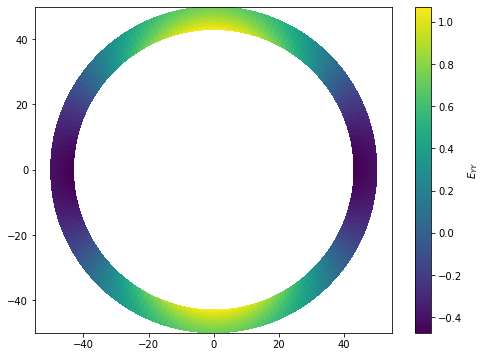

In [17]:
# Ploteo de E_yy

fig = plt.figure(figsize=(8, 6))
plt.pcolor(XX, YY, E_yy)
plt.colorbar(label = r'$E_{YY}$')
plt.axis('equal')
plt.plot()

C:\Users\ivanv\AppData\Local\Temp/ipykernel_10088/1481435694.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(XX, YY, E_xy)


[]

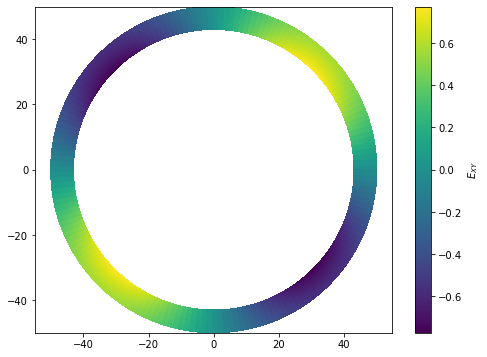

In [18]:
# Ploteo de E_xy

fig = plt.figure(figsize=(8, 6))
plt.pcolor(XX, YY, E_xy)
plt.colorbar(label = r'$E_{XY}$')
plt.axis('equal')
plt.plot()

#### Hecho con :heart: por Iván Vergara Lam